In [1]:
#import_libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
filename = '/content/drive/My Drive/Colab Notebooks/A_Learning/NEPTL/PythonForDataScience/Week4/Practice/Classification/income.csv'
data_income = pd.read_csv(filename,skipinitialspace=True)
data_income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [5]:
data_income.keys()

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [7]:
data_income.shape

(31978, 13)

In [8]:
print(np.unique(data_income['SalStat']))

[' greater than 50,000' ' less than or equal to 50,000']


In [ ]:
data = data_income.copy()

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [ ]:
data.isnull()
print('Data column with null value:\n',data.isnull().sum())

Data column with null value:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


## Summary of numerical variable

In [ ]:
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


### Summary of categorical variable 

In [ ]:
summary_cat= data.describe(include= "O")
print(summary_cat)

        JobType   EdType       maritalstatus      occupation relationship  \
count     31978    31978               31978           31978        31978   
unique        9       16                   7              15            6   
top     Private  HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq      22286    10368               14692            4038        12947   

         race gender  nativecountry                        SalStat  
count   31978  31978          31978                          31978  
unique      5      2             41                              2  
top     White   Male  United-States   less than or equal to 50,000  
freq    27430  21370          29170                          24283  


### Frequency of each data type 

In [ ]:
data["JobType"].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: JobType, dtype: int64

### Checking for unique  classes

In [ ]:
print(np.unique(data["JobType"])) 

['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


### Replacing unique value 

In [ ]:
data= pd.read_csv("income.csv", na_values=[' ?'])

In [ ]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [ ]:
missing = data[data.isnull().any(axis=1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
57,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
69,53,NaN,5th-6th,Widowed,NaN,Unmarried,Black,Female,0,0,30,United-States,"less than or equal to 50,000"
73,57,NaN,Assoc-voc,Widowed,NaN,Unmarried,White,Female,0,0,38,United-States,"less than or equal to 50,000"
75,20,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,24,United-States,"less than or equal to 50,000"
76,21,NaN,Some-college,Never-married,NaN,Unmarried,White,Female,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
missing.shape

(1816, 13)

In [ ]:
data2 = data.dropna(axis=0)
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
10,45,Self-emp-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,"greater than 50,000"


### Corelation Function

In [ ]:
corelation =data2.corr()
corelation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [ ]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
age              30162 non-null int64
JobType          30162 non-null object
EdType           30162 non-null object
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
gender           30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
nativecountry    30162 non-null object
SalStat          30162 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [ ]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [ ]:
data2.keys()

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

## Gender Proportion Table 

In [ ]:
gender = pd.crosstab(index = data2['gender'], columns = 'count', normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [ ]:
gender_salstat = pd.crosstab(index = data2['gender'], columns = data2['SalStat'], margins= True, normalize='index')
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


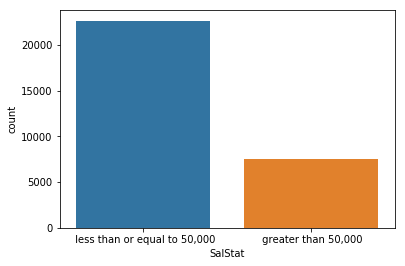

In [ ]:
salstat = sns.countplot(data2['SalStat'])

### Histogram of Age 

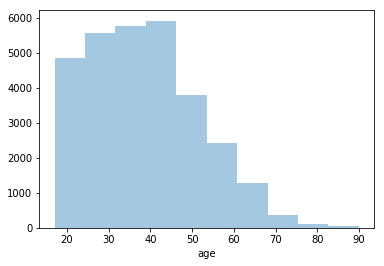

In [ ]:
sns.distplot(data2['age'], bins =10, kde = False)

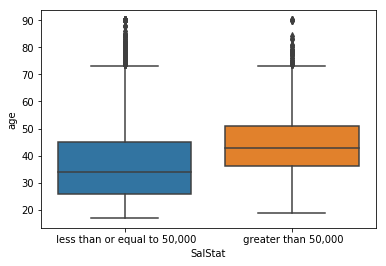

In [ ]:
sns.boxplot('SalStat','age', data =data2)

In [ ]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

# Logistic Regression

In [ ]:
data3 = data2.copy(deep=True)

In [ ]:
print(np.unique(data3['SalStat'])) 

[' greater than 50,000' ' less than or equal to 50,000']


In [ ]:
data2['SalStat'] = data2['SalStat'].map({' greater than 50,000':0, ' less than or equal to 50,000':1})

/home/ikst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data2['SalStat'].head()

0    1
1    1
2    0
3    1
4    1
Name: SalStat, dtype: int64

In [ ]:
new_data = pd.get_dummies(data2, drop_first=True)
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Now we can see whole data has converted in one hot incoding 

In [ ]:
new_data.keys()

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat',
       'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc',
       'JobType_ Self-emp-not-inc', 'JobType_ State-gov',
       'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th',
       'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th',
       'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors',
       'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters',
       'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation

In [ ]:
column_list = list(new_data.columns)
column_list 

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [ ]:
features = list(set(column_list)-set(['SalStat']))
print(features)

['nativecountry_ Italy', 'nativecountry_ Mexico', 'EdType_ 12th', 'nativecountry_ Philippines', 'capitalloss', 'nativecountry_ Columbia', 'nativecountry_ Scotland', 'EdType_ Prof-school', 'relationship_ Other-relative', 'nativecountry_ Germany', 'nativecountry_ Puerto-Rico', 'nativecountry_ Hungary', 'nativecountry_ France', 'nativecountry_ Haiti', 'EdType_ Assoc-voc', 'nativecountry_ Thailand', 'JobType_ State-gov', 'nativecountry_ Taiwan', 'relationship_ Wife', 'age', 'EdType_ 5th-6th', 'occupation_ Tech-support', 'EdType_ 1st-4th', 'occupation_ Exec-managerial', 'nativecountry_ Honduras', 'occupation_ Armed-Forces', 'nativecountry_ Laos', 'hoursperweek', 'nativecountry_ China', 'race_ Asian-Pac-Islander', 'nativecountry_ Poland', 'relationship_ Not-in-family', 'nativecountry_ Cuba', 'nativecountry_ Dominican-Republic', 'nativecountry_ Guatemala', 'maritalstatus_ Never-married', 'nativecountry_ India', 'occupation_ Handlers-cleaners', 'occupation_ Sales', 'nativecountry_ England', 'J

In [ ]:
y = new_data['SalStat'].values
print(y)

[1 1 0 ... 1 1 1]


In [ ]:
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=0)

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(train_x,train_y)

/home/ikst/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
logistic.coef_

array([[-6.41039728e-02,  8.81586830e-01,  4.00597877e-01,
        -1.05972748e-01, -6.43597411e-04,  1.64650762e-01,
         3.94306222e-02, -1.21655087e+00,  8.85764653e-01,
        -1.42207882e-01,  2.69020659e-01,  2.08788853e-02,
        -2.51974616e-02,  4.75396117e-02, -1.22138369e-01,
         2.78148795e-02,  7.74324684e-01,  2.71607696e-02,
        -9.98637517e-01, -2.27133462e-02,  6.99911711e-01,
        -6.63832971e-01,  4.02323597e-01, -6.84800458e-01,
         1.30484104e-02,  1.75405123e-02,  3.18840230e-02,
        -2.67758459e-02,  2.25672438e-01,  5.97062851e-01,
         5.95387689e-02,  8.04779048e-01,  2.32194996e-02,
         1.75036514e-01,  1.11130653e-01,  6.08017694e-01,
         2.53435177e-01,  9.16799959e-01, -5.19670744e-02,
        -8.64643791e-02,  7.47475776e-01,  9.50222726e-02,
        -6.81244058e-03, -3.12694786e-04,  5.14889604e-01,
         2.15891798e-01,  6.82573697e-02, -1.43538027e-02,
         1.19350161e-01, -4.23163887e-01,  7.44148289e-0

In [ ]:
logistic.intercept_

array([3.03621464])

#### Prediction from model

In [ ]:
prediction = logistic.predict(test_x)
print(prediction)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[1290,  936],
       [ 491, 6332]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8423030169079456


### Printing misclassified value from prediction

In [ ]:
print('misclassified sample: %d' %(test_y != prediction).sum())

misclassified sample: 1427


In [ ]:
print(data2['SalStat'])

0        1
1        1
2        0
3        1
4        1
5        1
6        1
7        1
9        1
10       0
11       0
12       0
13       0
14       1
15       1
16       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       0
27       0
28       0
30       1
31       1
32       1
        ..
31946    1
31947    1
31948    1
31949    1
31950    0
31951    1
31952    0
31953    1
31954    1
31955    1
31956    1
31957    1
31958    1
31959    0
31960    1
31961    1
31962    1
31963    1
31964    1
31965    0
31966    1
31969    1
31970    0
31971    1
31972    0
31973    1
31974    1
31975    1
31976    1
31977    1
Name: SalStat, Length: 30162, dtype: int64


In [ ]:
data2.keys()

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [ ]:
cols = ['gender','nativecountry','race','JobType']

In [ ]:
new_data =data2.drop(cols, axis=1)
new_data.keys()

Index(['age', 'EdType', 'maritalstatus', 'occupation', 'relationship',
       'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat'],
      dtype='object')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 9 columns):
age              30162 non-null int64
EdType           30162 non-null object
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
SalStat          30162 non-null int64
dtypes: int64(5), object(4)
memory usage: 3.6+ MB


In [ ]:
new_data = pd.get_dummies(new_data, drop_first=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 44 columns):
age                                     30162 non-null int64
capitalgain                             30162 non-null int64
capitalloss                             30162 non-null int64
hoursperweek                            30162 non-null int64
SalStat                                 30162 non-null int64
EdType_ 11th                            30162 non-null uint8
EdType_ 12th                            30162 non-null uint8
EdType_ 1st-4th                         30162 non-null uint8
EdType_ 5th-6th                         30162 non-null uint8
EdType_ 7th-8th                         30162 non-null uint8
EdType_ 9th                             30162 non-null uint8
EdType_ Assoc-acdm                      30162 non-null uint8
EdType_ Assoc-voc                       30162 non-null uint8
EdType_ Bachelors                       30162 non-null uint8
EdType_ Doctorate                    

In [ ]:
column_list = list(new_data.columns)

In [ ]:
features = list(set(column_list)-set(['SalStat']))
print(features)

['capitalgain', 'EdType_ 12th', 'occupation_ Priv-house-serv', 'maritalstatus_ Married-spouse-absent', 'capitalloss', 'occupation_ Protective-serv', 'EdType_ Assoc-acdm', 'EdType_ Masters', 'maritalstatus_ Widowed', 'EdType_ Prof-school', 'relationship_ Other-relative', 'EdType_ Preschool', 'maritalstatus_ Married-civ-spouse', 'EdType_ Assoc-voc', 'EdType_ 7th-8th', 'relationship_ Wife', 'age', 'EdType_ 5th-6th', 'maritalstatus_ Married-AF-spouse', 'occupation_ Tech-support', 'EdType_ 1st-4th', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Other-service', 'occupation_ Armed-Forces', 'occupation_ Prof-specialty', 'EdType_ 9th', 'occupation_ Transport-moving', 'occupation_ Machine-op-inspct', 'hoursperweek', 'occupation_ Farming-fishing', 'relationship_ Unmarried', 'EdType_ Doctorate', 'relationship_ Not-in-family', 'relationship_ Own-child', 'maritalstatus_ Separated', 'maritalstatus_ Never-married', 'EdType_ HS-grad', 'occupation_ Handlers-cleaners', 'occupati

In [ ]:
y = new_data['SalStat'].values
print(y)

[1 1 0 ... 1 1 1]


In [ ]:
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]]


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=0)
logistic = LogisticRegression()
logistic.fit(train_x,train_y)

/home/ikst/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
prediction = logistic.predict(test_x)
print(prediction)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[1274,  952],
       [ 506, 6317]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8388772240026522


In [ ]:
### Printing misclassified value from prediction

print('misclassified sample: %d' %(test_y != prediction).sum())

misclassified sample: 1458


## KNN classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
prediction = KNN_classifier.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[1365,  861],
       [ 640, 6183]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8341253177146646
